In [13]:
import numpy as np
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [22]:
defaultindex  = defaultdict(int)
with open('dataset.txt','r') as f:
    for line in f.readlines():
        words=line.strip().split(',')
        for word in words: 
            if(defaultindex.get(word,None) is None):                                
                defaultindex[word]=1           
    f.close()

In [23]:
dataset = []
with open('dataset.txt','r') as f:
    for line in f.readlines():
        words=line.strip().split(',')
        tmp=[]
        for key in defaultindex.keys():    
            if(key in words):
                tmp.append(1)
            else:
                tmp.append(0)
        dataset.append(tmp)
            

In [29]:
df = pd.DataFrame(dataset, columns=list(defaultindex.keys()))

In [31]:
df.to_csv('market.csv',index=False)

In [11]:
df = pd.read_csv('./market.csv')

In [6]:
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 171 entries, citrus fruit to preservation products
dtypes: int64(171)
memory usage: 12.8 MB


item codification in the particule

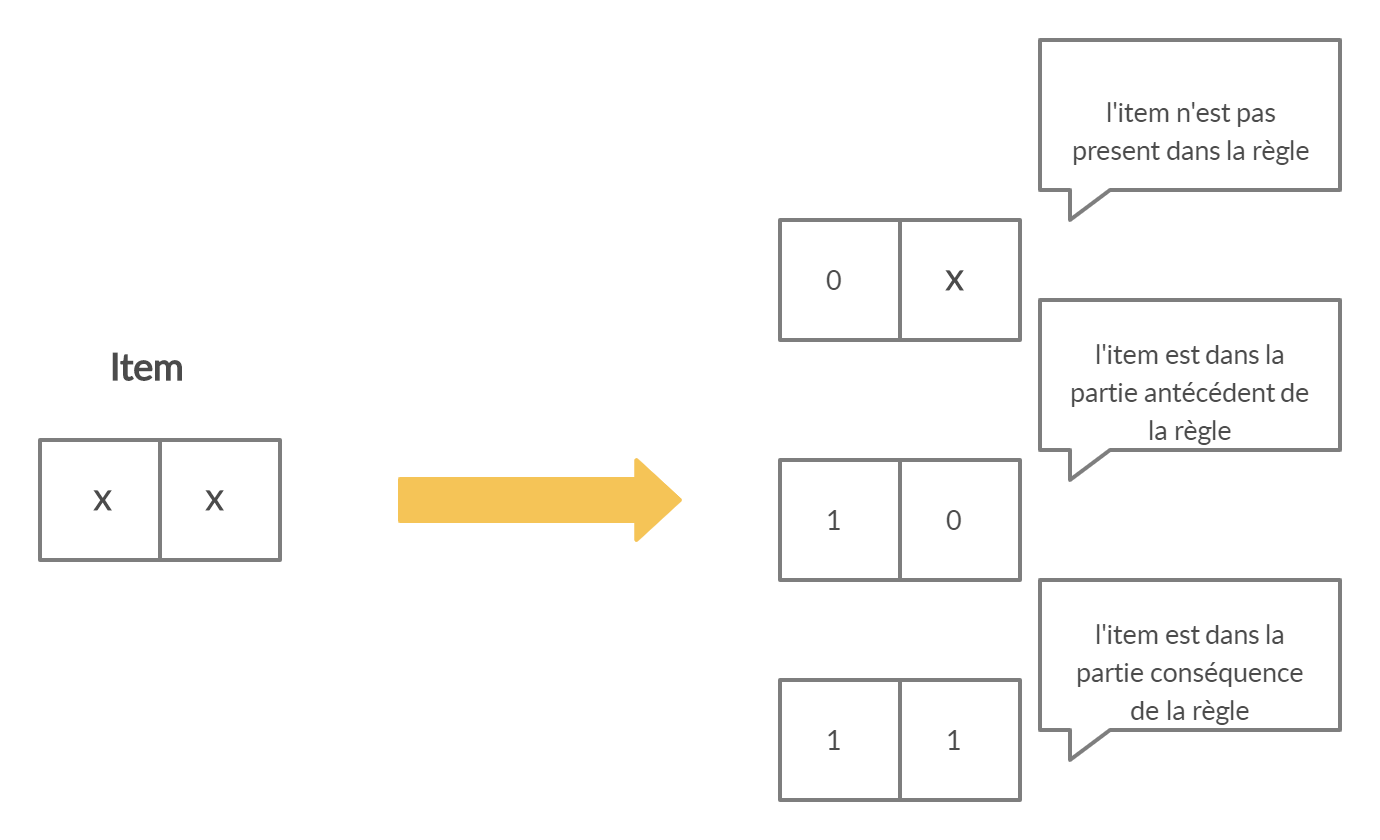

In [15]:
from IPython.display import Image
Image(filename='item.png')

In [3]:
N=2*len(df.columns)

In [4]:
np.random.seed(42)

In [5]:
import time

In [290]:
df.describe().loc["mean",:]

citrus fruit             0.082766
semi-finished bread      0.017692
margarine                0.058566
ready soups              0.001830
tropical fruit           0.104931
                           ...   
bags                     0.000407
cooking chocolate        0.002542
sound storage medium     0.000102
kitchen utensil          0.000407
preservation products    0.000203
Name: mean, Length: 171, dtype: float64

In [6]:
df_size=len(df)

In [15]:


particules=[np.random.choice(2,N,p=[0.98, 0.02]) for _ in range(5000)]
regle=[]
premis=[]
bestParticules=[]
start_time = time.time()
for particule in particules:
    if(not validParticule(particule)):
        continue
    
    supportRegle =np.array([False for _ in range(df_size)])
    supportPremis =np.array([False for _ in range(df_size)])
    
    enter=False

    for i in range(0,N,2):
        index=round(i/2)
    
        if(particule[i]==1):
            if(particule[i+1]==0): 
                #enter the if (particule[i]==1) for the first time
                if(not enter):
                    # for calculation sup(X)  in X=>Y
                    supportPremis = np.array(df.iloc[:,index]==1)
                else:
                    # for calculation sup(X)  in X=>Y
                    supportPremis = supportPremis & np.array(df.iloc[:,index]==1)
                    
                    
            #enter the if (particule[i]==1) for the first time
            if(not enter):
                # for calculation sup(X=>Y)  in X=>Y
                supportRegle = np.array(df.iloc[:,index]==1)
                enter=True
            else: 
                # for calculation sup(X=>Y)  in X=>Y
                supportRegle =  supportRegle &   np.array(df.iloc[:,index]==1)
    
    
    # after completing the particule evaluation
    regle.append((supportRegle==True).sum()/df_size)
    premis.append((supportPremis==True).sum()/df_size)
    bestParticules.append(particule)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.5728847980499268 seconds ---


In [16]:
gbest=0
gbestfitness=0
for i in range(len(regle)):
    if(regle[i]!=0 and premis[i]!=0):
        if(regle[i]/premis[i] > gbestfitness):
            gbestfitness=regle[i]/premis[i]
            gbest=i
            showRule(bestParticules[gbest],df.columns)
            print(" confiance= {}".format(gbestfitness))

#showRule(bestParticules[gbest],df.columns)
#print(" confiance= {}".format(gbestfitness))


(whole milk,oil,seasonal products,)=> soda, confiance= 0.25
(sausage,ketchup,)=> napkins, confiance= 0.3333333333333333
(margarine,other vegetables,dog food,)=> rice, confiance= 0.5


In [8]:
def validParticule(particule):
    validConclusion=False
    validPremis=False
    for i in range(0,len(particule),2):
        if(particule[i]==1):
            #if particule has the conclusion part
            if(particule[i+1]==1):
                validConclusion=True
            #if particule has the premis part
            else:
                validPremis=True
    if(validPremis and validConclusion):
        return True
        

In [9]:
def showRule(particule,columns):
    premis=[]
    conclusion=[]
    for i in range(0,len(particule),2):
        if(particule[i]==1):
            #if particule has the conclusion part
            if(particule[i+1]==1):
                conclusion.append(columns[i/2])
            #if particule has the premis part
            else:
                premis.append(columns[i/2])
    print('(',end='')          
    for pre in premis:
        print(pre,end=',')
    print(')=>',end=' ')
    for con in conclusion:
        print(con,end=',')
  
    
    

In [326]:
df.shape[0]

9835